In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
colors = {"orange" : "#E69F00", "light_blue" : "#56B4E9",
          "green" : "#009E73", "yellow" : "#F0E442",
          "blue" : "#0072B2", "red" : "#D55E00",
          "pink" : "#CC79A7", "black" : "#000000"}

In [36]:
data = pd.read_csv('sensitivity-grid.csv', index_col=[0,1,2,3,4,5,6,7,8])

In [31]:
index = data.index
data = data.reset_index()
data = data[data['f_s']==0.20]
data = data[data['hiring_firing']!=35] 
#data = data[data['industry']==0.10] 
data = data.groupby(by=['production_function', 'consumer_facing', 'industry', 'f_s', 'ratio_c_s', 'tau', 'hiring_firing', 'l2', 'retail']).mean()

## Print index associated with minimum

In [37]:
uw_min, w_min = data.idxmin()
print(uw_min)
print(w_min)

('linear', 0.99, 0.1, 0.15, 0.4, 21, 28, 42, 0)
('linear', 0.99, 0.2, 0.3, 0.4, 21, 28, 42, 0)


In [38]:
# use weighted data and subtract minimum
data = data['weighted']
data = data - data.loc[w_min]

In [39]:
# get index levels
prodfuncs = data.index.get_level_values('production_function').unique()
consumer_facing = data.index.get_level_values('consumer_facing').unique()
industry = data.index.get_level_values('industry').unique()
f_s = data.index.get_level_values('f_s').unique()
ratio_c_s = data.index.get_level_values('ratio_c_s').unique()
tau = data.index.get_level_values('tau').unique()
hiring_firing = data.index.get_level_values('hiring_firing').unique()
l2 = data.index.get_level_values('l2').unique()
retail = data.index.get_level_values('retail').unique()

## 1D sensitivity through the optimal parameter set

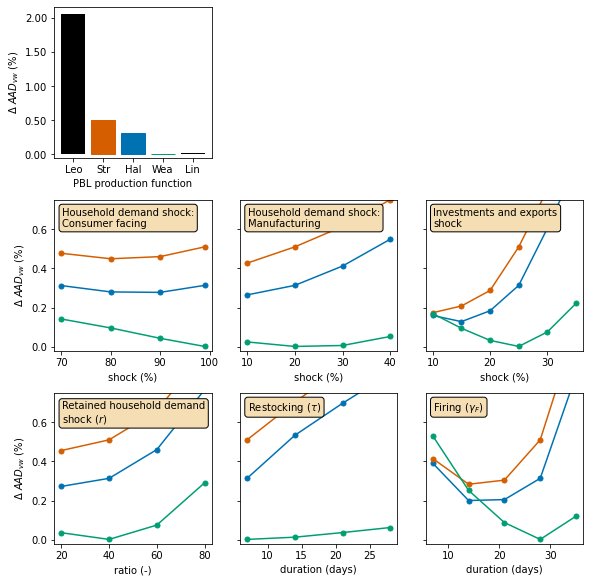

In [48]:
fig,ax = plt.subplots(nrows=3, ncols=3, sharey='row', figsize=(8.3, 0.7*11.7))

##################
## PBL Barbplot ##
##################

ax[0,0].bar(['Leo', 'Str', 'Hal', 'Wea', 'Lin'], data.loc[slice(None), 0.99,0.20,0.25,0.4,7,28,42,0].values, color='black')
ax[0,0].set_ylabel('$\Delta\ AAD_{vw}$ (%)')
from matplotlib.ticker import FormatStrFormatter
ax[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='white', alpha=1)
#ax[0,0].text(0.05, 0.95, "PBL production function", transform=ax[0,0].transAxes, fontsize=10,
#                verticalalignment='top', bbox=props)
ax[0,0].set_xlabel('PBL production function')
ax[0,0].set_ylim([-0.05,None])

ax[0,0].get_children()[1].set_color(colors['red'])
ax[0,0].get_children()[2].set_color(colors['blue'])
ax[0,0].get_children()[3].set_color(colors['green'])

fig.delaxes(ax[0,1])
fig.delaxes(ax[0,2])

################
## Second row ##
################

ax[1,0].plot(100*consumer_facing, data.loc['half_critical', :,0.2,0.25,0.4,7,28,42,0], marker='o', markersize=5, color=colors['blue'])
ax[1,0].plot(100*consumer_facing, data.loc['strongly_critical', :,0.2,0.25,0.4,7,28,42,0], marker='o', markersize=5, color=colors['red'])
ax[1,0].plot(100*consumer_facing, data.loc['weakly_critical',:,0.2,0.25,0.4,7,28,42,0], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[1,0].text(0.05, 0.95, "Household demand shock:\nConsumer facing", transform=ax[1,0].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[1,0].set_xlabel('shock (%)')
ax[1,0].set_ylabel('$\Delta\ AAD_{vw}$ (%)')
ax[1,0].set_xlabel('shock (%)')

ax[1,1].plot(100*industry, data.loc['half_critical', 0.99,:,0.25,0.4,7,28,42,0], marker='o', markersize=5, color=colors['blue'])
ax[1,1].plot(100*industry, data.loc['strongly_critical', 0.99,:,0.25,0.4,7,28,42,0], marker='o', markersize=5, color=colors['red'])
ax[1,1].plot(100*industry, data.loc['weakly_critical', 0.99,:,0.25,0.4,7,28,42,0], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[1,1].text(0.05, 0.95, "Household demand shock:\nManufacturing", transform=ax[1,1].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[1,1].set_xlabel('shock (%)')

ax[1,2].plot(100*f_s,  data.loc['half_critical', 0.99,0.2,:,0.4,7,28,42,0], marker='o', markersize=5, color=colors['blue'])
ax[1,2].plot(100*f_s, data.loc['strongly_critical', 0.99,0.2,:,0.4,7,28,42,0], marker='o', markersize=5, color=colors['red'])
ax[1,2].plot(100*f_s, data.loc['weakly_critical', 0.99,0.2,:,0.4,7,28,42,0], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[1,2].text(0.05, 0.95, "Investments and exports\nshock", transform=ax[1,2].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[1,2].set_xlabel('shock (%)')
ax[1,2].set_ylim([-0.02,0.75])

###############
## Third row ##
###############

ax[2,0].plot(100*ratio_c_s, data.loc['half_critical', 0.99,0.2,0.25,:,7,28,42,0], marker='o', markersize=5, color=colors['blue'])
ax[2,0].plot(100*ratio_c_s, data.loc['strongly_critical', 0.99,0.2,0.25,:,7,28,42,0], marker='o', markersize=5, color=colors['red'])
ax[2,0].plot(100*ratio_c_s, data.loc['weakly_critical', 0.99,0.2,0.25,:,7,28,42,0], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[2,0].text(0.05, 0.95, "Retained household demand\nshock ($r$)", transform=ax[2,0].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[2,0].set_xlabel('ratio (-)')
ax[2,0].set_ylabel('$\Delta\ AAD_{vw}$ (%)')

ax[2,1].plot(tau, data.loc['half_critical', 0.99,0.2,0.25,0.40,:,28,42,0], marker='o', markersize=5, color=colors['blue'])
ax[2,1].plot(tau, data.loc['strongly_critical', 0.99,0.2,0.25,0.40,:,28,42,0], marker='o', markersize=5, color=colors['red'])
ax[2,1].plot(tau, data.loc['weakly_critical', 0.99,0.2,0.25,0.40,:,28,42,0], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[2,1].text(0.05, 0.95, "Restocking ($\\tau$)", transform=ax[2,1].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[2,1].set_xlabel('duration (days)')

ax[2,2].plot(hiring_firing, data.loc['half_critical', 0.99,0.2,0.25,0.40,7,:,42,0], marker='o', markersize=5, color=colors['blue'])
ax[2,2].plot(hiring_firing, data.loc['strongly_critical', 0.99,0.2,0.25,0.40,7,:,42,0], marker='o', markersize=5, color=colors['red'])
ax[2,2].plot(hiring_firing, data.loc['weakly_critical', 0.99,0.2,0.25,0.40,7,:,42,0], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[2,2].text(0.05, 0.95, "Firing ($\\gamma_F$)", transform=ax[2,2].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[2,2].set_xlabel('duration (days)')
ax[2,2].set_ylim([-0.02,0.75])

plt.tight_layout()
fig.savefig('slice_minimum.pdf')
plt.show()
plt.close()

## Restocking, production function and exogenous demand

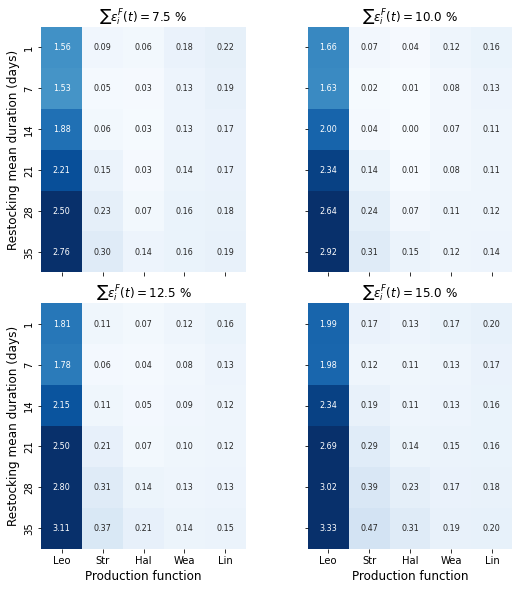

<module 'matplotlib.pyplot' from '/home/twallema/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [8]:
# Extend with exogenous demand (3 panels)

fig,ax=plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8.3,8.3))
    
ax[0,0] = sns.heatmap(np.transpose(weighted[:,5,1,0,3,:,4,2]), xticklabels=prodfuncs, yticklabels=tau,
                    annot=True, fmt=".2f", vmin=0, vmax=2.5, cbar=False, ax=ax[0,0], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[0,0].set_ylabel('Restocking mean duration (days)', size=12)
ax[0,0].set_title('$\sum \\kappa_i^F(t) = 7.5~\%$', size=12)

ax[0,1] = sns.heatmap(np.transpose(weighted[:,5,1,0,4,:,4,2]), xticklabels=prodfuncs, yticklabels=tau,
                    annot=True, fmt=".2f", vmin=0, vmax=2.5, cbar=False, ax=ax[0,1], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[0,1].set_title('$\sum \\kappa_i^F(t) = 10.0~\%$', size=12)


ax[1,0] = sns.heatmap(np.transpose(weighted[:,5,1,0,5,:,4,2]), xticklabels=prodfuncs, yticklabels=tau,
                    annot=True, fmt=".2f", vmin=0, vmax=2.5, cbar=False, ax=ax[1,0], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[1,0].set_xlabel('Production function', size=12)
ax[1,0].set_ylabel('Restocking mean duration (days)', size=12)
ax[1,0].set_title('$\sum \\kappa_i^F(t) = 12.5~\%$', size=12)


ax[1,1].set_xlabel('Production function', size=12)
ax[1,1].set_title('$\sum \\kappa_i^F(t) = 15.0~\%$', size=12)
ax[1,1] = sns.heatmap(np.transpose(weighted[:,5,1,0,6,:,4,2]), xticklabels=prodfuncs, yticklabels=tau,
                    annot=True, fmt=".2f", vmin=0, vmax=2.5, cbar=False, ax=ax[1,1], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[1,1].set_xlabel('Production function', size=12)

plt.tight_layout()
plt.savefig('prodfunc_tau.pdf')
plt.show()
plt

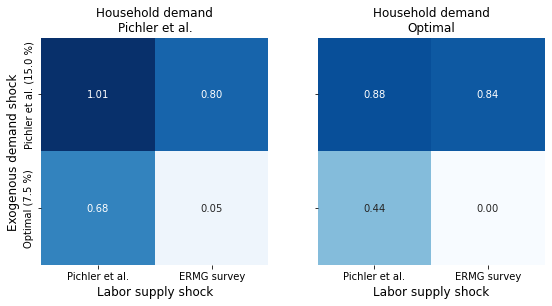

In [12]:
# Raw data
consumer_pichler = np.array([[5.81, 5.60],[5.48, 4.85]])
consumer_optimal = np.array([[5.68, 5.64],[5.24, 4.80]])
# Raw data minus optimum
consumer_pichler -= 4.80
consumer_optimal -= 4.80

fig,ax=plt.subplots(ncols=2,sharey=True, figsize=(8.3,8.3/2))

ax[0] = sns.heatmap(consumer_pichler, xticklabels=['Pichler et al.','ERMG survey'], yticklabels=['Pichler et al. (15.0 %)', 'Optimal (7.5 %)'],
                    annot=True, fmt=".2f", vmin=0, vmax=1, cbar=False, ax=ax[0], square=True, annot_kws={"fontsize": 10},
                    cmap="Blues")
ax[0].set_ylabel('Exogenous demand shock', size=12)
ax[0].set_xlabel('Labor supply shock', size=12)
ax[0].set_title('Household demand\nPichler et al.', size=12)

ax[1] = sns.heatmap(consumer_optimal, xticklabels=['Pichler et al.','ERMG survey'], yticklabels=['Pichler et al. (15.0 %)', 'Optimal (7.5 %)'],
                    annot=True, fmt=".2f", vmin=0, vmax=1, cbar=False, ax=ax[1], square=True, annot_kws={"fontsize": 10},
                    cmap="Blues")
ax[1].set_title('Household demand\nOptimal', size=12)
ax[1].set_xlabel('Labor supply shock', size=12)

plt.tight_layout()
plt.savefig('comparing_shocks.pdf')
plt.show()
plt.close()